In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import PIL

import tensorflow as tf
import keras.layers
from keras.models import Sequential
import keras

 

In [2]:
#download flower datasets
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir =tf.keras.utils.get_file('flower_photos',origin=dataset_url,untar=True)
data_dir =pathlib.Path(data_dir)

228813984/228813984 [==============================] - 28s 0us/step


In [3]:
# berapa jumlah gambar yang ditarik
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


sebuah data sets terdiri dari 3670 images bunga yang di bagi kedalam sebuah 5 sub direktori : dandelion,roses,tulips,daisy, dan sunflowers

In [4]:
print(os.listdir(data_dir))

['daisy', 'dandelion', 'LICENSE.txt', 'roses', 'sunflowers', 'tulips']


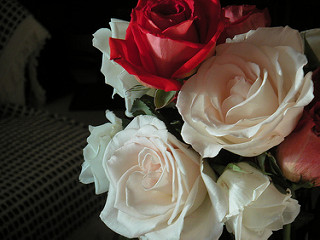

In [15]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(roses[1])

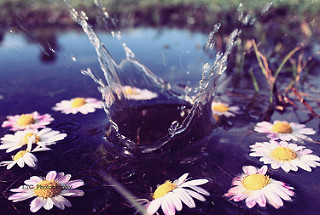

In [17]:
daisy = list(data_dir.glob('daisy/*'))
PIL.Image.open(daisy[2])

ukuran dari setiap gambar sangat berbeda maka dari itu diperlukan untuk melakukan pross resize